# **Support Vector Machines** #

**Regression**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor

**Loading Dataset**

In [2]:
df = pd.read_csv("../Datasets/energy_efficiency.csv")

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


**Scaling**

we scale the regression target for SVR

In [3]:
scalerY = MinMaxScaler()

target_variable = "heating_load"
min_y = df[target_variable].min()
max_y = df[target_variable].max()

num_vars = [target_variable]
df[num_vars] = scalerY.fit_transform(df[num_vars])


**Train/Test Split**

we will drop the cooling load from the dataset and make the target only heating load for this model

In [4]:
X = df.drop(["heating_load", "cooling_load"], axis=1)
y = df["heating_load"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


we will use GridSearchCV to find optimal SVM parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.25, 0.5, 1, 1.25, 1.5],
    'epsilon': [0.075, 0.1, 0.125],
    'gamma': [1, 0.25, 0.1, 0.05, 0.01], 
    'kernel': ['rbf']
}

test_model = GridSearchCV(svm.SVR(), param_grid, verbose=3)
test_model.fit(X_train, y_train) 

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END C=0.1, epsilon=0.075, gamma=1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.075, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.075, gamma=1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.075, gamma=1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.075, gamma=1, kernel=rbf;, score=0.779 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.075, gamma=0.25, kernel=rbf;, score=0.901 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.075, gamma=0.25, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.075, gamma=0.25, kernel=rbf;, score=0.881 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.075, gamma=0.25, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.075, gamma=0.25, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.075, gamma=0.

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.25, 0.5, 1, 1.25, 1.5],
                         'epsilon': [0.075, 0.1, 0.125],
                         'gamma': [1, 0.25, 0.1, 0.05, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
print(test_model.best_params_)
print(test_model.best_score_)

{'C': 1.5, 'epsilon': 0.075, 'gamma': 0.1, 'kernel': 'rbf'}
0.9402798826399545


**SVM Model**

In [59]:
model = make_pipeline(StandardScaler(), svm.SVR(C=1.5, gamma=0.1, epsilon=0.075, kernel='rbf'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1.5, epsilon=0.075, gamma=0.1))])

**Error and performance metrics**

In [60]:
predictions = model.predict(X_test)

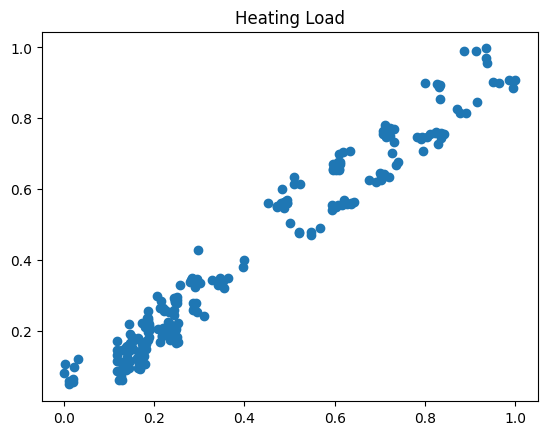

In [61]:
plt.scatter(y_test, predictions)
plt.title("Heating Load")
plt.show()


The plots seems to be following a diagonal lines showing that model is relatively performing well
There clusters are less prominent compared to previous regression model showing that SVR is working better.

**Metrics**

In [62]:
#heating load metrics

# MAE - Mean average error
print("Heating Load Metrics:")
print("\nMAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

# R-squared. 0 =bad  1 =good
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))


Heating Load Metrics:

MAE
0.05

MSE
0.0

RMSE:
0.06

R-squared:
0.96


The metrics show us that the model is performing better than previous linear regression model MAE shows that the predictions are only off by 0.05 and there is negligible gap between MAE and RMSE shows that there are almost no extreme outliers. R-squared shows that model is working really well n alot better than linear regression model.

**Prediction Test with Sample Data**

In [63]:
sample = pd.DataFrame({
    'relative_compactness': [0.64],
    'surface_area': [784.0],
    'wall_area': [343.0],
    'roof_area': [220.5],
    'overall_height': [3.5],
    'orientation': [5.0],
    'glazing_area': [0.4],
    'glazing_area_distribution': [5.0]
})

prediction = model.predict(sample)
scaled_heating_load = prediction[0]

heating_load = scaled_heating_load * (max_y - min_y) + min_y

print(f"Heating Load: {heating_load:.2f}")


Heating Load: 18.70


The predictions are fairly accurate 

**Summary**

We have imported all the libraries first then we imported the data and scaled it for SVR and split dataset in Train/Test and ran GridSearchCV to find optimal parameters and then used those parameters to train our model and it performed better than linear regression model 

Linear regression can be used in real life for mostly linear relationships but SVR can be useful for capturing some non-linear relationships and its more tolerant of outliers and provide more control with tuning.

This Excercise was slightly more challenging because of trying to use GridSearchCv as i tried using the optimised version but it was having issues and taking forever to run but simplified version worked.

We could optimise this better by using RandomizedSearchCV to make it a bit more time eficient and try different using different kernels.